In [142]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter("ignore")

In [149]:
brasil = pd.read_csv("brazil_covid19.csv")
infos_brasil = pd.read_excel("populacao-e-pib-por-estados.xlsx")
mundo = pd.read_csv("covid_19_clean_complete.csv")

In [144]:
brasil["date"] = pd.to_datetime(brasil["date"])
mundo["Date"] = pd.to_datetime(mundo["Date"])

# Ranking de casos por país e estatísticas gerais

In [145]:
mundohoje = mundo[mundo["Date"] == mundo["Date"].max()][["Country/Region", "Province/State", "Confirmed", "Deaths"]].sort_values(by=['Confirmed'], ascending = False)
print(mundo["Date"].max())
mundohoje = mundohoje.fillna("")
pd.set_option('display.max_rows', 500)
display(mundohoje)
print(mundohoje.describe())

2020-04-07 00:00:00


,Country/Region,Province/State,Confirmed,Deaths
20061,US,,396223,12722
20037,Spain,,141942,14045
19973,Italy,,135586,17127
19952,France,,109069,10328
19956,Germany,,107663,2016
19898,China,Hubei,67803,3212
19969,Iran,,62589,3872
20059,United Kingdom,,55242,6159
20049,Turkey,,34109,725
20042,Switzerland,,22253,821


           Confirmed        Deaths
count     261.000000    261.000000
mean     5463.961686    313.659004
std     29527.475296   1767.264747
min         0.000000      0.000000
25%        30.000000      1.000000
50%       241.000000      3.000000
75%      1149.000000     22.000000
max    396223.000000  17127.000000


# Ranking de casos por estado do Brasil e estatísticas gerais

In [146]:
brasilhoje = brasil[brasil["date"] == brasil["date"].max()].sort_values(by=['cases'], ascending = False)
brasilhoje["média"]
print(brasil["date"].max())
display(brasilhoje[["state", "cases", "deaths"]])
print(brasilhoje.describe())

2020-04-08 00:00:00


,state,cases,deaths
1886,São Paulo,6708,428
1885,Rio de Janeiro,1938,106
1869,Ceará,1291,43
1878,Amazonas,804,30
1884,Minas Gerais,614,14
1888,Rio Grande do Sul,555,9
1887,Paraná,539,17
1863,Distrito Federal,509,12
1868,Bahia,497,15
1889,Santa Catarina,457,15


             cases      deaths
count    27.000000   27.000000
mean    589.888889   29.629630
std    1297.719607   82.550753
min      18.000000    0.000000
25%      51.500000    2.000000
50%     227.000000    7.000000
75%     524.000000   15.000000
max    6708.000000  428.000000


# Casos e mortes em São Paulo por dia

,date,cases,deaths,cases_dif,deaths_dif
69,2020-04-08,6708,428,1026,57
68,2020-04-07,5682,371,816,67
67,2020-04-06,4866,304,246,29
66,2020-04-05,4620,275,154,15
65,2020-04-04,4466,260,418,41
64,2020-04-03,4048,219,542,31
63,2020-04-02,3506,188,525,24
62,2020-04-01,2981,164,642,28
61,2020-03-31,2339,136,822,23
60,2020-03-30,1517,113,66,15


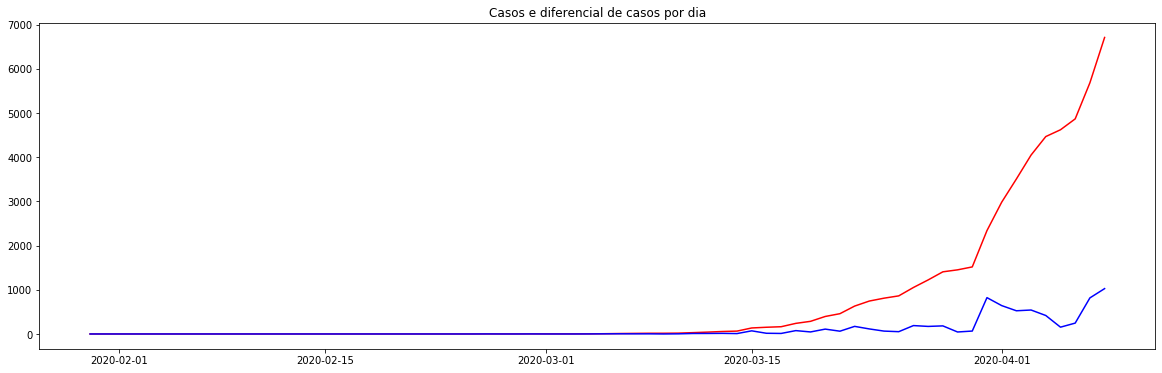

<Figure size 432x288 with 0 Axes>

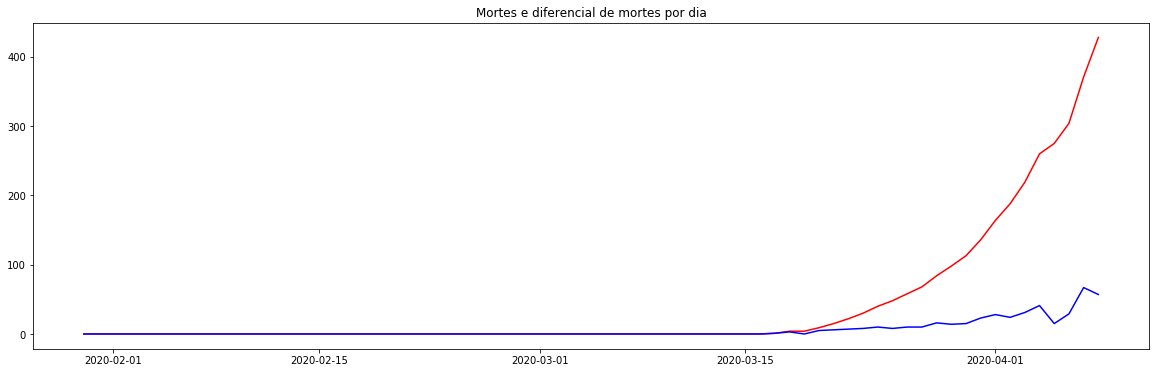

<Figure size 432x288 with 0 Axes>

In [147]:
SaoPaulo = brasil[brasil["state"] == "São Paulo"][["date", "cases", "deaths"]].sort_values(by="date", ascending=True)
SaoPaulo = SaoPaulo.reset_index(drop=True)

SaoPaulo['cases_dif'] = 0
SaoPaulo['deaths_dif'] = 0
for i in range(SaoPaulo.shape[0] - 1):
    SaoPaulo['cases_dif'][i+1] = (SaoPaulo['cases'][i+1] - SaoPaulo['cases'][i])
    SaoPaulo['deaths_dif'][i+1] = (SaoPaulo['deaths'][i+1] - SaoPaulo['deaths'][i])

display(SaoPaulo.sort_values(by="date", ascending=False).head(15))
    
SaoPaulo = SaoPaulo.sort_values(by="date", ascending=True)
plt.figure(figsize=(20, 6))
plt.title("Casos e diferencial de casos por dia")
plt.plot(SaoPaulo["date"], SaoPaulo["cases"], color = "red")
plt.plot(SaoPaulo["date"], SaoPaulo["cases_dif"], color = "blue")
plt.show()
plt.clf()

plt.figure(figsize=(20, 6))
plt.title("Mortes e diferencial de mortes por dia")
plt.plot(SaoPaulo["date"], SaoPaulo["deaths"], color = "red")
plt.plot(SaoPaulo["date"], SaoPaulo["deaths_dif"], color = "blue")
plt.show()
plt.clf()